# Построение графиков с помощью pandas и seaborn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# для более функциональной работы с окнами графиков прописать:
# %matplotlib notebook 

# установка стиля графиков:
plt.style.use('seaborn-whitegrid') # стиль графиков 

In [2]:
titanic_data = pd.read_csv(r"D:\My Jupyter Notebook\Datasets\train.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Линейные графики

In [3]:
series_age = titanic_data['Age'] # age
series_age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

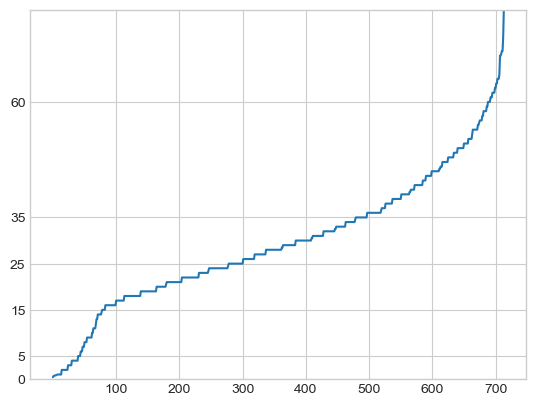

In [4]:
# По умолчанию он строит линейные графики (kind='')
series_age.sort_values().plot(use_index=0,xticks=[100,200,300,400,500,600,700],yticks=[0,5,15,25,35,60],ylim=[0,80]) 

# use_index=False - чтобы не использовать индексы в качестве рисок

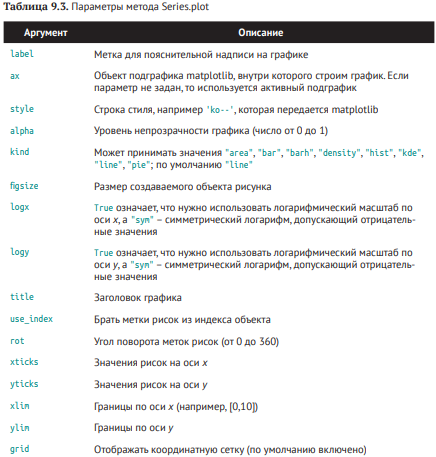

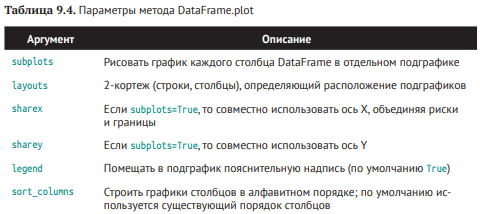

In [5]:
football_data = pd.read_csv('data_football')
football_data

,name,speed,shoot,dribbling,pas,phy,def,rating,position
0,messi,7,10,10,10,7,6,91,attack
1,ronaldo,8,9,7,6,9,5,81,attack
2,neymar,9,7,9,8,6,5,81,attack
3,ibra,6,7,7,7,8,6,76,middle
4,mbappe,10,8,8,7,7,4,81,attack
5,ramos,6,7,5,7,7,9,76,defender
6,alba,7,6,6,8,6,7,75,defender
7,modric,7,8,7,9,7,7,83,middle
8,xavi,7,7,8,9,6,8,83,defender
9,de_bruyne,7,8,7,10,7,7,85,middle


<AxesSubplot:>

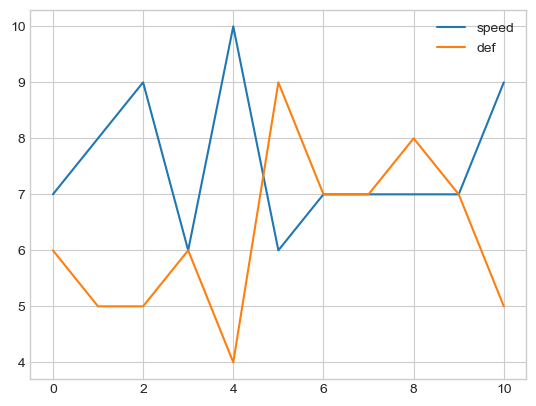

In [6]:
football_data[['speed','def']].plot()

### Столбчатые диаграммы

<AxesSubplot:>

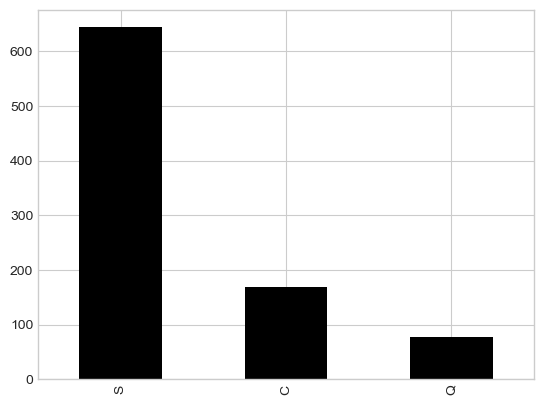

In [7]:
titanic_data['Embarked'].value_counts().plot.bar(alpha=1, color='black') # plot.bar()

<AxesSubplot:>

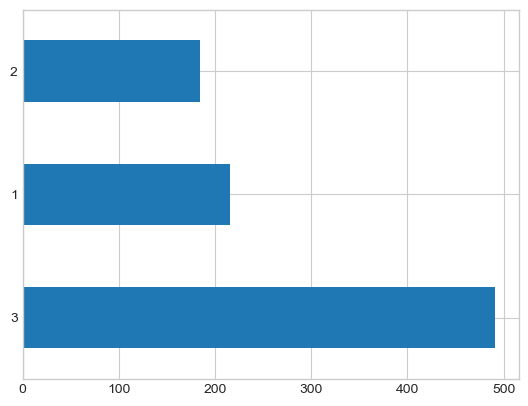

In [8]:
titanic_data['Pclass'].value_counts().plot.barh()

<AxesSubplot:>

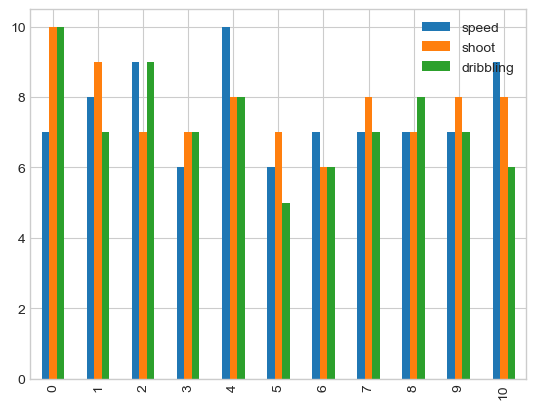

In [9]:
football_data[['speed','shoot','dribbling']].plot.bar()

<AxesSubplot:>

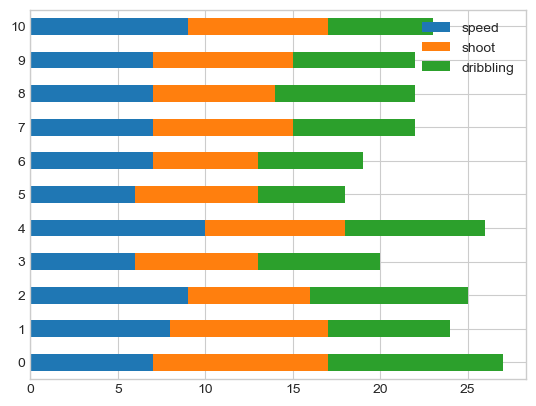

In [10]:
football_data[['speed','shoot','dribbling']].plot.barh(stacked=True) # составная столбчатая диаграмма

In [11]:
data1 = titanic_data.iloc[:,[1,2,4,5,11]]
data1

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,NaN,S
889,1,1,male,26.0,C


In [12]:
# таблица частот pd.crosstab

crosstab1 = pd.crosstab(data1['Sex'],data1['Pclass'])
crosstab1

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


<AxesSubplot:ylabel='Sex'>

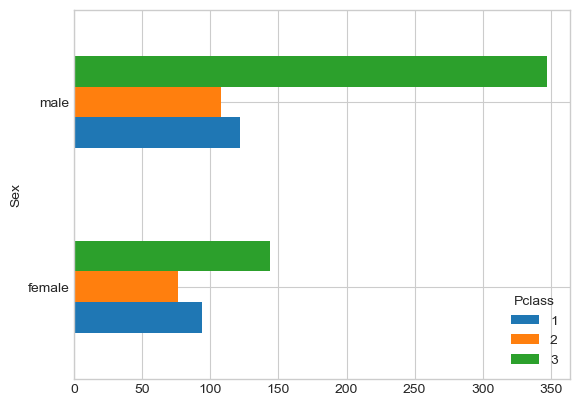

In [13]:
crosstab1.plot.barh()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

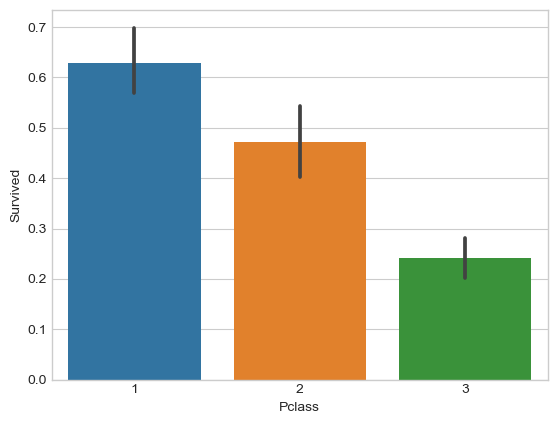

In [14]:
# или более функциональный seaborn

sns.barplot(y='Survived', x='Pclass', data=data1)  # доверительные интервалы 

## Гистограммы и графики плотности

<AxesSubplot:ylabel='Frequency'>

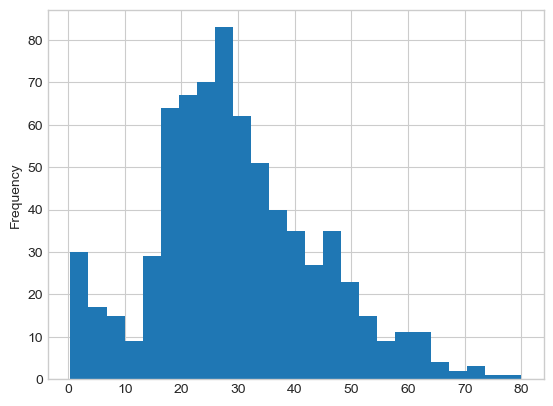

In [15]:
# гистограмма

data1['Age'].plot.hist(bins=25)   # распределение возраста

<AxesSubplot:ylabel='Density'>

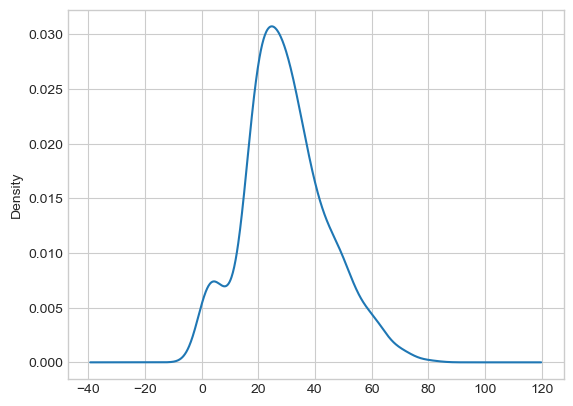

In [16]:
# график плотности

data1['Age'].plot.kde()    # или data1['Age'].plot(kind='kde') или data1['Age'].plot.density()

<AxesSubplot:xlabel='Age', ylabel='Count'>

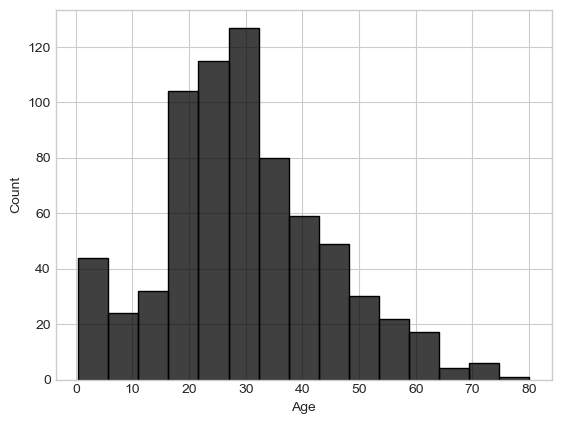

In [17]:
sns.histplot(data1['Age'],bins=15,color='black')

## Диаграммы рассеяния

Диаграмма рассеяния, или точечная диаграмма, – полезный способ исследования соотношения между двумя одномерными рядами данных. 

C:\Users\dermi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='phy', ylabel='shoot'>

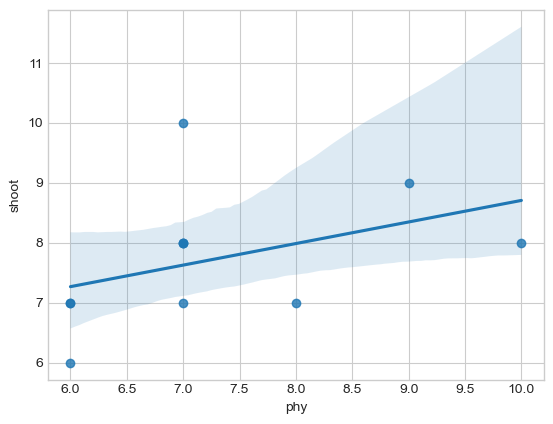

In [18]:
sns.regplot(football_data['phy'], football_data['shoot'])

В разведочном анализе данных полезно видеть все диаграммы рассеяния 
для группы переменных; это называется диаграммой пар, или матрицей диаграмм рассеяния.

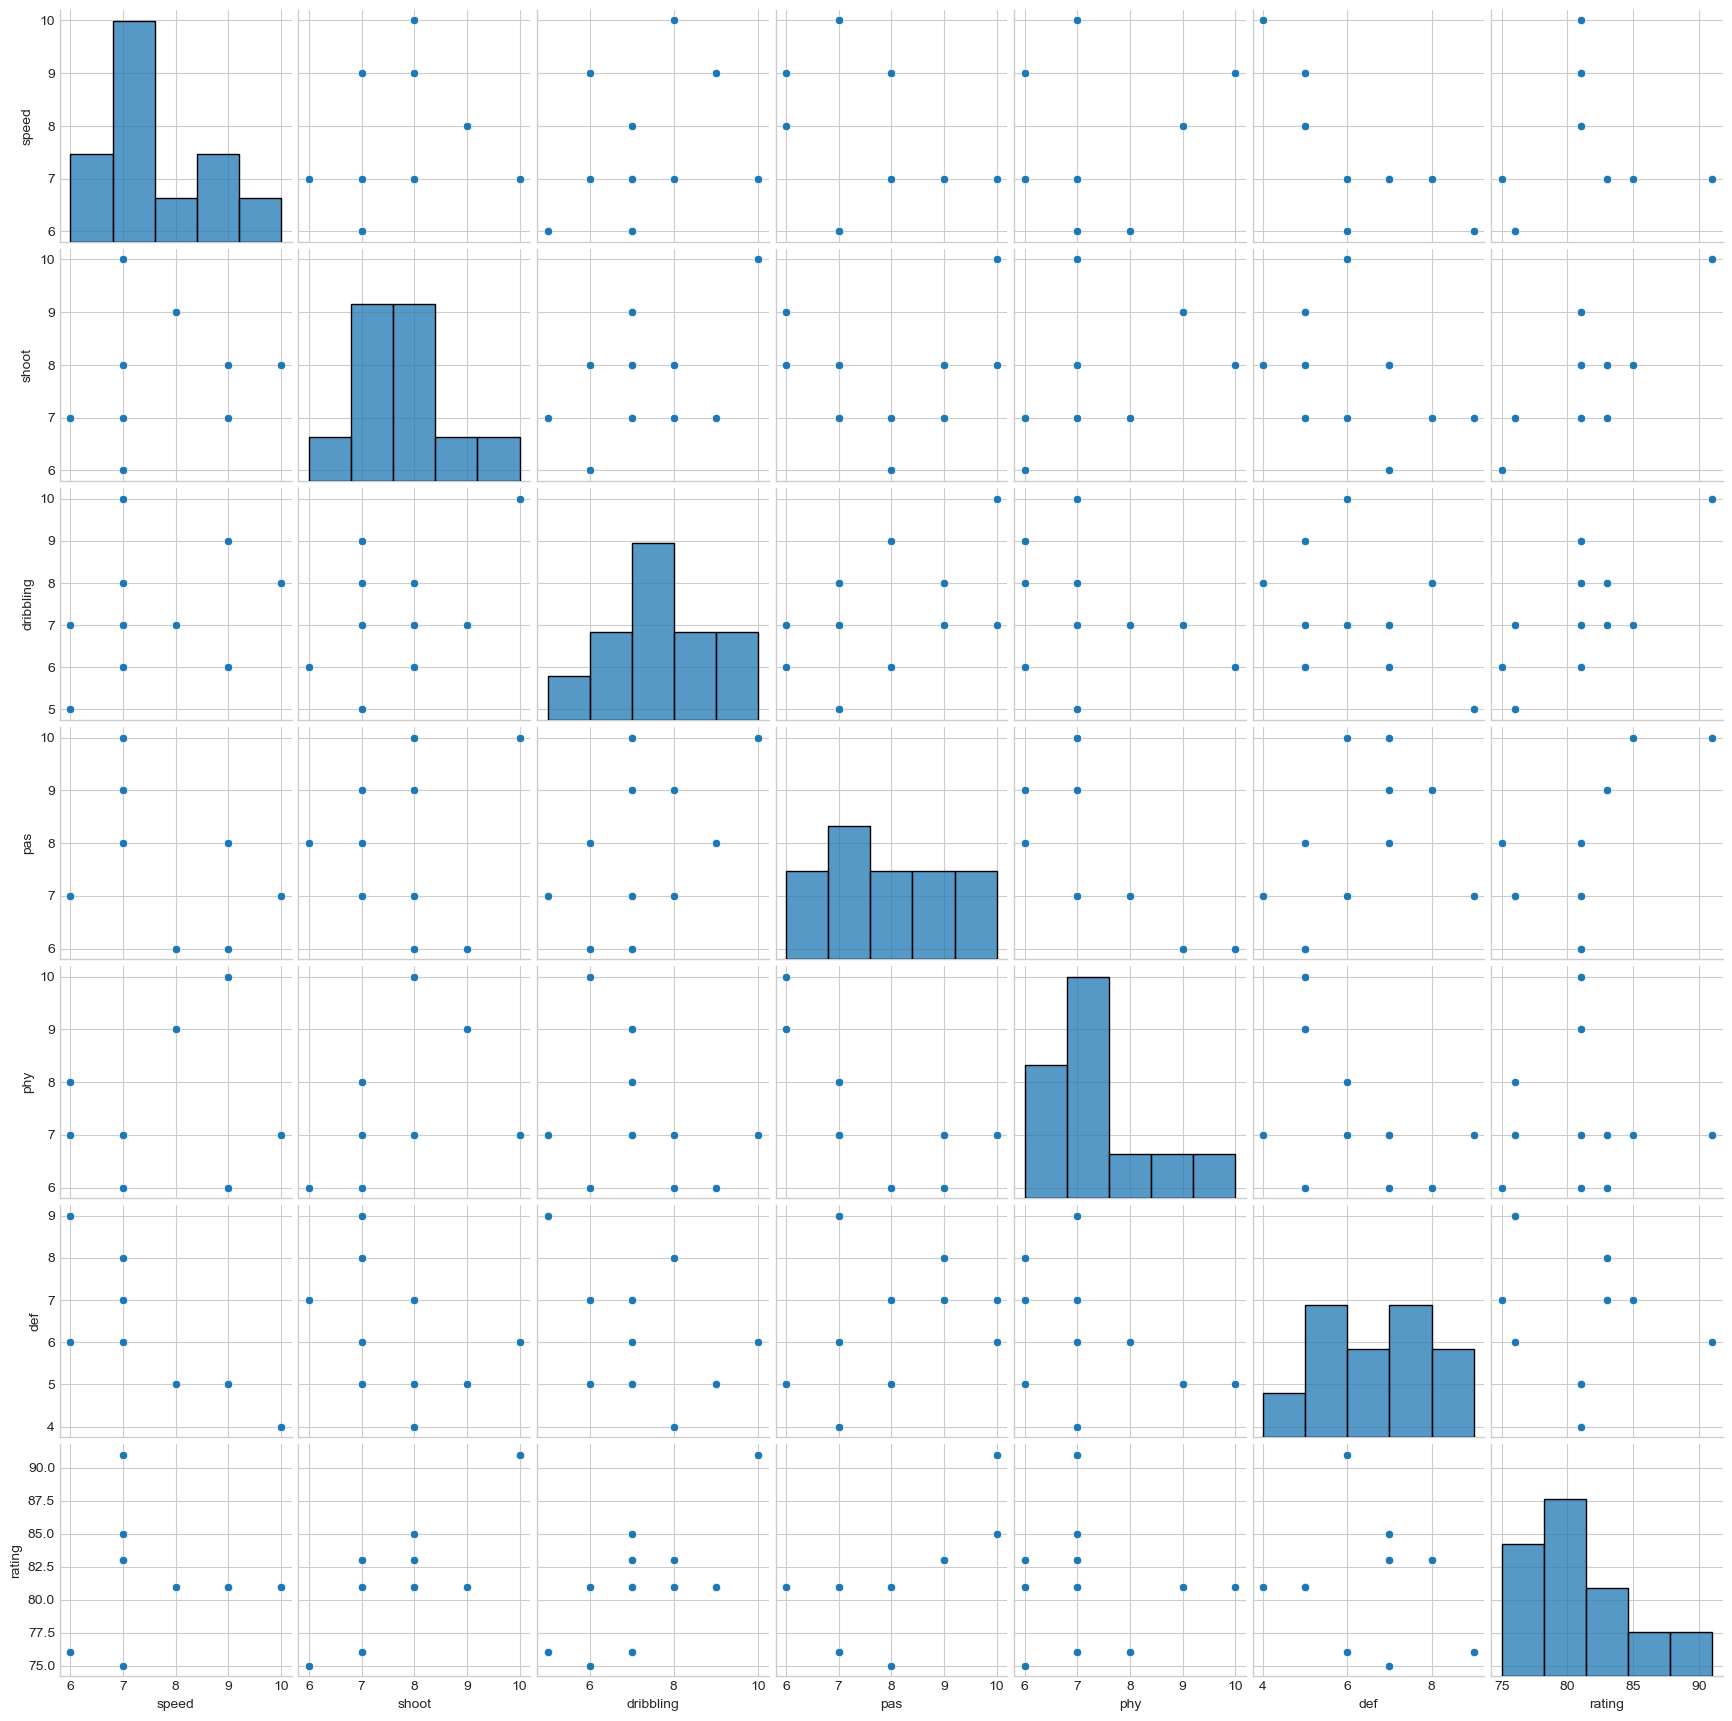

In [19]:
sns.pairplot(football_data)

## Фасетные сетки и категориальные данные

в seaborn имеется полезная функция catplot, которая упрощает 
построение разнообразных фасетных графиков, определяемых категориальными переменными

In [40]:
data_embarked = data1['Embarked'].dropna()
data_embarked
sns.catplot(x=data1['Age'], y=data1['Age'])         # о_О

TypeError: object of type 'NoneType' has no len()

<AxesSubplot:>

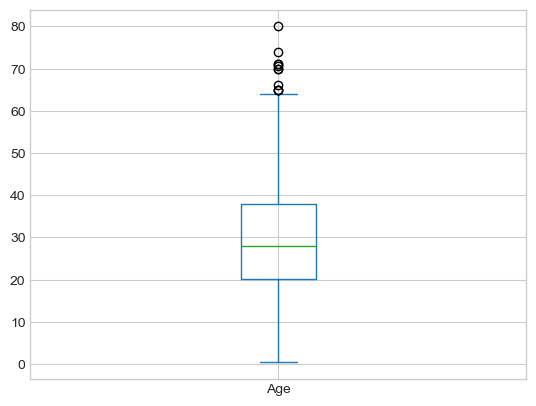

In [21]:
data1['Age'].plot.box()  # ящик с усами